In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [394]:
#Load data
crime = pd.read_csv('/root/Documents/DSviz/newyorkcrime.csv')
#Convert to lower case
crime.columns = map(str.lower, crime.columns)
#Replace column name with first word of name
crime.columns = crime.columns.str.split().str[0].str.strip()
#crime.head()
#Select data
crime = crime[['property','city','population','murder','robbery']]
crime.dtypes

property      object
city          object
population    object
murder         int64
robbery       object
dtype: object

In [395]:
#the data is diffiult to work with, errors thrown when converting entries to floats and ints.
#entries like '1,917'

#make a function to only capture class[0-9] the commas out and convert to float

valid = '1234567890.' #valid characters for a float
def sanitize(data):
    return int(''.join(filter(lambda char: char in valid, data)))

#use apply to apply the function
crime['population'] = crime['population'].apply(sanitize)
crime['robbery'] = crime['robbery'].apply(sanitize)
crime['property'] = crime['property'].apply(sanitize)
crime.dtypes



property       int64
city          object
population     int64
murder         int64
robbery        int64
dtype: object

In [396]:
# now the d.types are fine

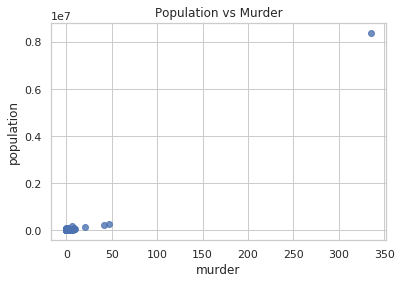

In [397]:
#visualize some of the data

sns.set(style='whitegrid')
g = sns.regplot(x='murder', y='population', data=crime, fit_reg=False)
plt.title('Population vs Murder')
plt.show()

In [398]:
#there seems to be an outlier city
print(crime.loc[crime['population']>800000]['city'])

216    New York
Name: city, dtype: object


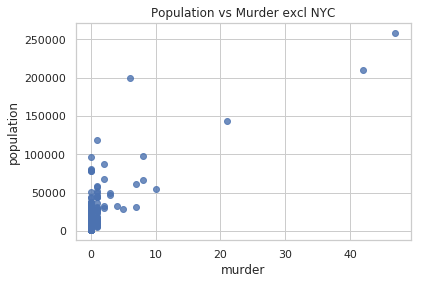

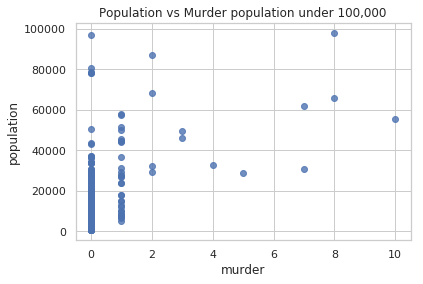

In [399]:
#visualizations of population and murder under 800000
g = sns.regplot(x='murder',
                y='population',
                data=crime.loc[crime['population']<800000],
                fit_reg=False)
plt.title('Population vs Murder excl NYC')
plt.show()
#under 100000
g = sns.regplot(x='murder',
                y='population',
                data=crime.loc[crime['population']<100000],
                fit_reg=False)
plt.title('Population vs Murder population under 100,000')
plt.show()

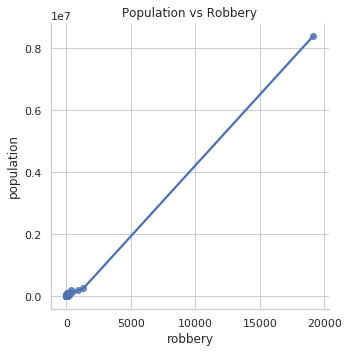

In [400]:
g = sns.lmplot(x='robbery',
                y='population',
                data=crime,
                lowess=True)
plt.title('Population vs Robbery')
plt.show()



Again the same outlier NYC, maybe it could helpful to look at percentage instead of the nominal value

In [401]:
crime.head()

,property,city,population,murder,robbery
0,12,Adams Village,1861,0,0
1,24,Addison Town and Village,2577,0,0
2,16,Akron Village,2846,0,0
3,4090,Albany,97956,8,227
4,223,Albion Village,6388,0,4


In [402]:
crimer = crime.copy()
crimer['robbery'] = crimer['robbery']/crimer['population']
crimer['murder'] = crimer['murder']/crimer['population']
crimer['property'] = crimer['property']/crimer['population']

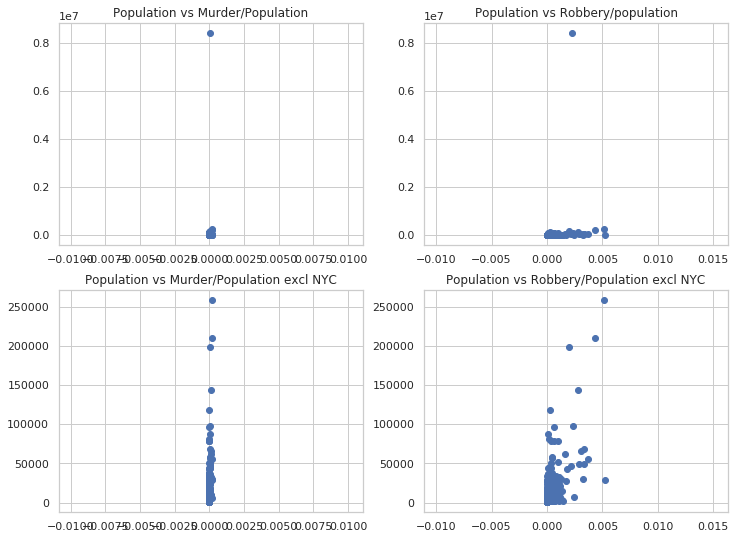

New York City Scores: 
 Robbery pc 216    0.002283
Name: robbery, dtype: float64 
 Murder pc 216    0.00004
Name: murder, dtype: float64


In [403]:
#Visual rates instead of counts
g = plt.figure(figsize=(12,9))

g.add_subplot(221)
plt.scatter(x='murder', y='population', data=crimer)
plt.title('Population vs Murder/Population')

g.add_subplot(222)
plt.scatter(x='robbery', y='population', data=crimer)
plt.title('Population vs Robbery/population')

g.add_subplot(223)
plt.scatter(x='murder', y='population', data=crimer.loc[crimer['population']<800000])
plt.title('Population vs Murder/Population excl NYC')

g.add_subplot(224)
plt.scatter(x='robbery', y='population', data=crimer.loc[crimer['population']<800000])
plt.title('Population vs Robbery/Population excl NYC')

plt.show()

print('New York City Scores: \n Robbery pc {} \n Murder pc {}'.format(
crimer.loc[crimer['city']=='New York']['robbery'],crimer.loc[crimer['city']=='New York']['murder']))

Visually it difficult to see precisely, however you see that some cities have relatively high robbery/population values.

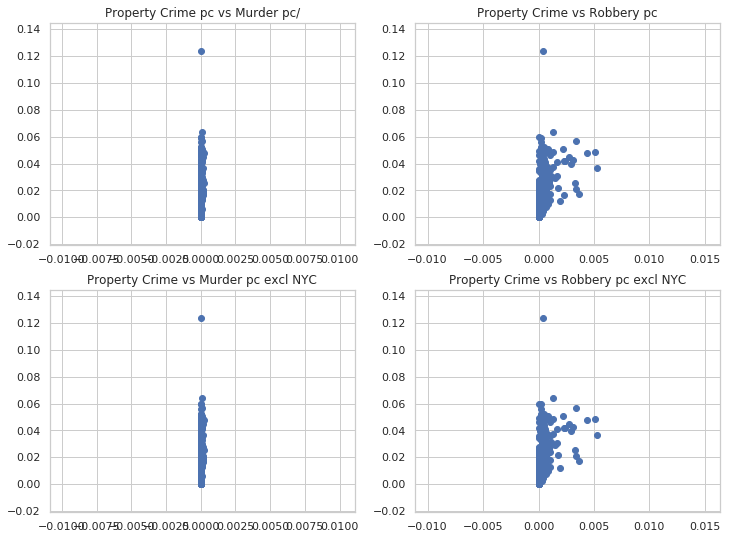

New York City Scores: 
 Property Crime pc 216    0.016909
Name: property, dtype: float64


In [404]:
#Visual rates instead of counts
g = plt.figure(figsize=(12,9))

g.add_subplot(221)
plt.scatter(x='murder', y='property', data=crimer)
plt.title('Property Crime pc vs Murder pc/')

g.add_subplot(222)
plt.scatter(x='robbery', y='property', data=crimer)
plt.title('Property Crime vs Robbery pc')

g.add_subplot(223)
plt.scatter(x='murder', y='property', data=crimer.loc[crimer['population']<800000])
plt.title('Property Crime vs Murder pc excl NYC')

g.add_subplot(224)
plt.scatter(x='robbery', y='property', data=crimer.loc[crimer['population']<800000])
plt.title('Property Crime vs Robbery pc excl NYC')

plt.show()

print('New York City Scores: \n Property Crime pc {}'.format(
crimer.loc[crimer['city']=='New York']['property']))

In [405]:
#There still seems to be an outlier for property crime.
crimer.loc[crimer['property']>.12]

,property,city,population,murder,robbery
289,0.123624,Seneca Falls Town,2362,0.0,0.000423


In [406]:
#look at original data
crime.loc[crime['city']=='Seneca Falls Town']

,property,city,population,murder,robbery
289,292,Seneca Falls Town,2362,0,1


Seneca Falls Town seems to stand out, its propery crime rate is extremely high relative to the other cities, when population is taken into account.

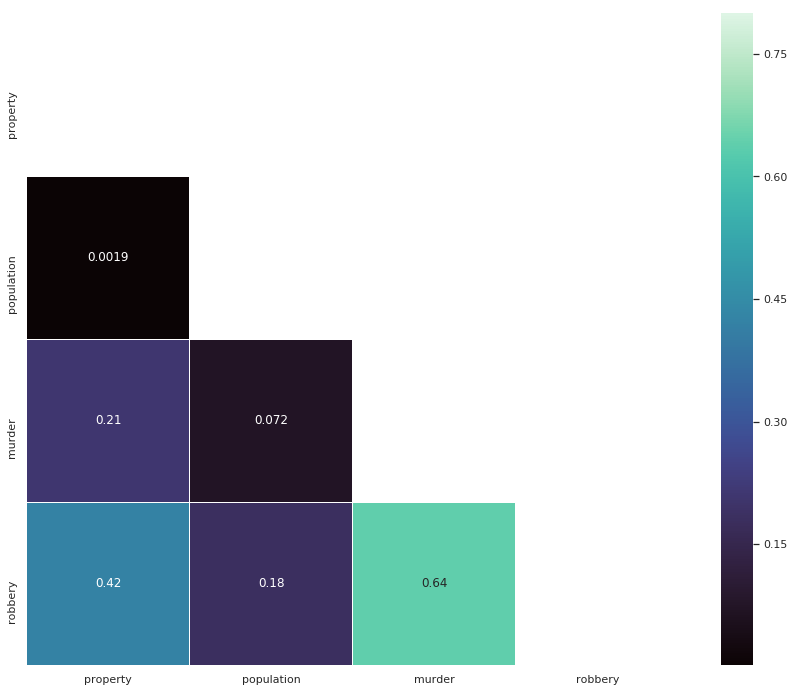

In [407]:
#show correlation for numeric variables
#create heat map to show correlation between variables.
corrmat = crimer.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
    
with sns.axes_style('white'):    
    ax = plt.subplots(figsize=(15,12))

    sns.heatmap(corrmat,
            vmax=.8, 
            cmap="mako",
            annot=True,
            linewidth=.05,
            square=True,
            mask=mask)


plt.show()

The correlation matrix shows us that robbery and murder are correlated.

In [408]:
# drop NYC, as it is actually multiple cities and Seneca Falls
crime = crime.drop([216,289]) 

In [409]:
#create data set to conform to formula
# propertycrime = α+Population+Population**2+Murder+Robbery

In [410]:
#Create variables needed
crime['murder'] = np.where((crime['murder']>0), 1, 0)
crime['robbery'] = np.where((crime['robbery']>0), 1, 0)
crime['popsq'] = crime['population']**2

In [411]:
crime = crime[['property','population','popsq','murder','robbery']]

In [412]:
crime.head(1)

,property,population,popsq,murder,robbery
0,12,1861,3463321,0,0
